In [1]:
import pickle
import tphate
import numpy

# Load the data
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)


In [2]:
deep_trajectories = data["deep_trajectories"]

deep_trajectories = numpy.concatenate([deep_trajectories["0Mg"], deep_trajectories["GluGly"]], axis=0)
deep_trajectories = numpy.transpose(deep_trajectories, (0, 2, 1))
deep_trajectories = numpy.reshape(deep_trajectories, (-1, deep_trajectories.shape[-1]))

phate_operator = tphate.TPHATE()
data_tphate = phate_operator.fit_transform(deep_trajectories[:5000])

Calculating TPHATE...
  Running TPHATE on 5000 observations and 6 variables.
  Landmarking not recommended; setting n_landmark to 5000
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.18 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.21 seconds.
  Learning the autocorrelation function...
  Calculating Autocorr kernel...
    Dropoff point: 1
  Combining PHATE operator and autocorr operator
  No autocorrelation measured; converging with PHATE
  Calculating optimal t...
    Automatically selected t = 34
  Calculated optimal t in 44.39 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 13.50 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 96.08 seconds.
Calculated TPHATE in 157.36 seconds.


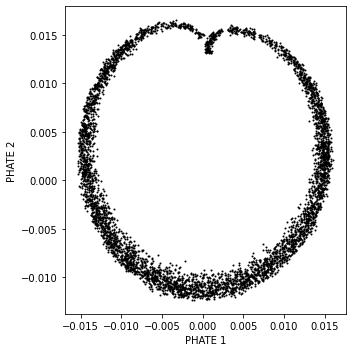

In [9]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(5, 5))
ax.scatter(data_tphate[:, 0], data_tphate[:, 1], s=1, c='k')
ax.set_xlabel('PHATE 1')
ax.set_ylabel('PHATE 2')
fig.tight_layout()
pyplot.show()